In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('email.csv')

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.sample(5)

,Category,Message
201,ham,I sent you &lt;#&gt; bucks
74,ham,U can call me now...
1234,ham,Lol ok. I'll snatch her purse too.
882,ham,"see, i knew giving you a break a few times wou..."
95,spam,Your free ringtone is waiting to be collected....


In [5]:
df.shape

(5572, 2)

In [6]:
# Data cleaning
# EDA
# Text preprocessing
# Model
# Evaluation
# Improvement
# Deploy

## Data Cleaning

In [7]:
df.info() # no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
# to drop columns , if required
# df.drop(columns=[''],[''],inplace=True)

In [9]:
df.rename(columns={'Category':'Target'},inplace=True)
df.head(5)

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['Target']=encoder.fit_transform(df['Target'])

In [12]:
df.head()

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#missing values

In [14]:
df.isnull().sum()

Target     0
Message    0
dtype: int64

In [15]:
# duplicated

In [16]:
df.duplicated().sum()

415

In [17]:
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5157, 2)

# EDA

In [20]:
df['Target'].value_counts()

Target
0    4516
1     641
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x19979de3fd0>,
 [Text(-1.017194586770333, 0.41870654717251754, 'ham'),
  Text(1.0171945769697988, -0.41870657098167496, 'spam')],
 [Text(-0.5548334109656361, 0.22838538936682773, '87.57'),
  Text(0.5548334056198901, -0.22838540235364085, '12.43')])

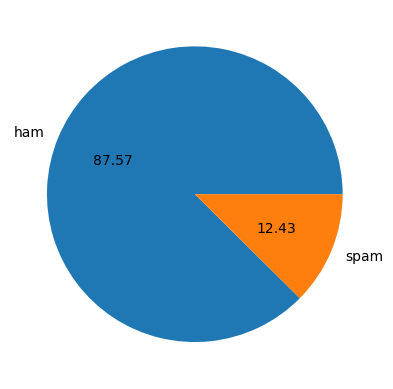

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [22]:
#data is imbalanced

In [23]:
import nltk

In [24]:
df['num_characters']=df['Message'].apply(len)

In [25]:
df.head()

,Target,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
df['num_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head(10)

,Target,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
5,1,FreeMsg Hey there darling it's been 3 week's n...,147,39
6,0,Even my brother is not like to speak with me. ...,77,18
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31
8,1,WINNER!! As a valued network customer you have...,157,32
9,1,Had your mobile 11 months or more? U R entitle...,154,31


In [28]:
df['num_sentence']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head(10)

,Target,Message,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,147,39,4
6,0,Even my brother is not like to speak with me. ...,77,18,2
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2
8,1,WINNER!! As a valued network customer you have...,157,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3


In [30]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
df[df['Target']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
df[df['Target']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [33]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

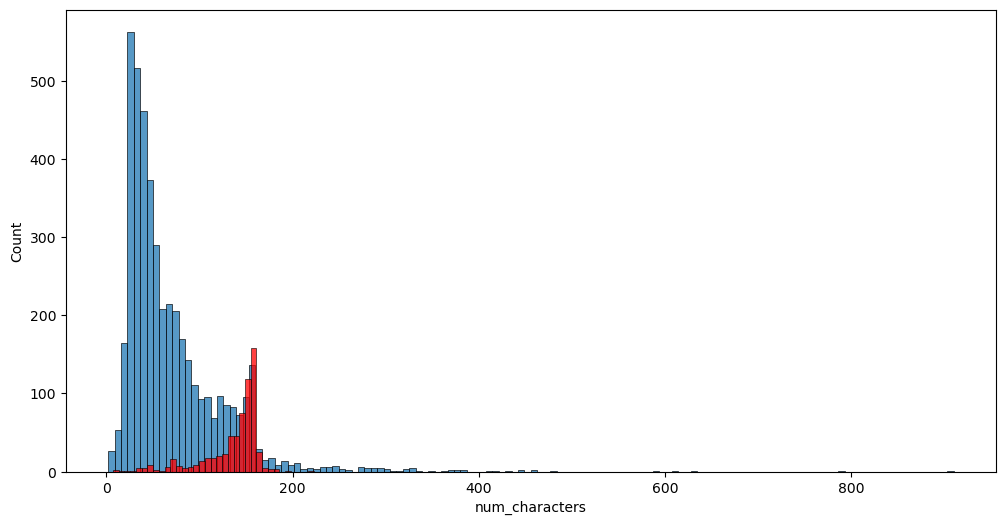

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

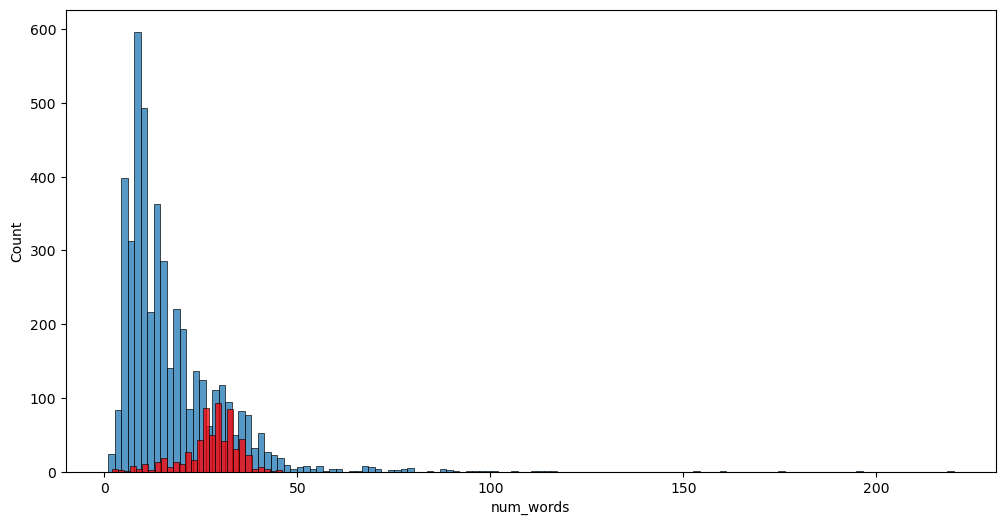

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='red')

In [36]:
# Mostly spam messages hs too many characters,words,although many outliers are present,very small spam messages and very large ham messages(upto 900 characters) are also present.

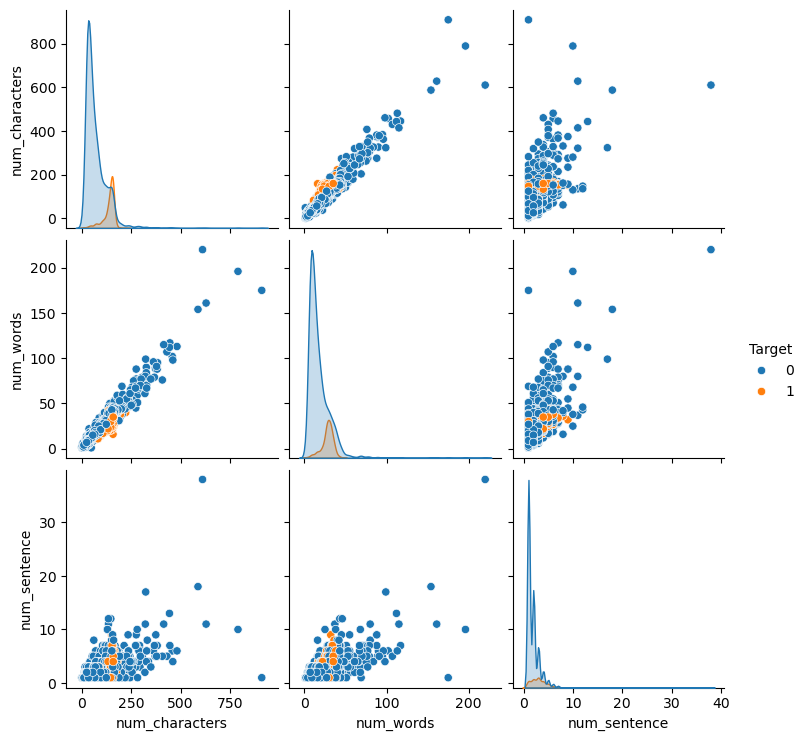

In [37]:
sns.pairplot(df,hue='Target')

In [38]:
# too much outliers,and num_characters vs num_words is very linear.

<Axes: >

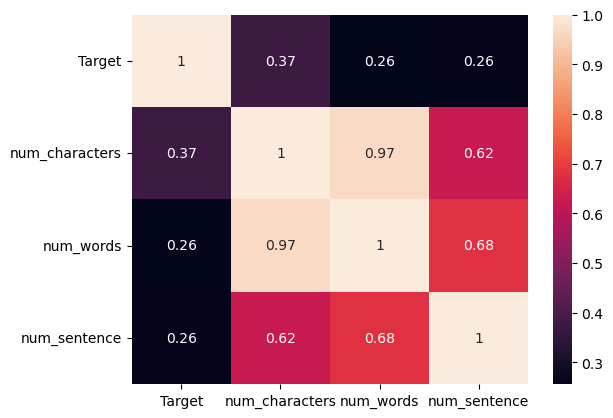

In [39]:
numeric_df = df.select_dtypes(include=['float64', 'int64','int32'])
sns.heatmap(numeric_df.corr(), annot=True)


In [40]:
# target has most correlation with num_characters,so if I have keep only one column,I will keep num_characters

# Text Preprocessing

In [41]:
def transform_text(text):
    text = text.lower() # lowercasing
    text = nltk.word_tokenize(text)# tokenization
    # removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    # removing punctuation and stopwords
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    #stemming
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [43]:
from textblob import TextBlob

In [44]:
from nltk.corpus import stopwords

In [45]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
from nltk.stem.porter import PorterStemmer

In [48]:
ps = PorterStemmer()

In [49]:
df['transformed_text'] = df['Message'].apply(transform_text)

In [50]:
from wordcloud import WordCloud

In [51]:
wc=WordCloud(width=500,height=500,min_font_size=12,background_color='black')
spam_wc = wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep=" "))

<Figure size 1200x600 with 0 Axes>

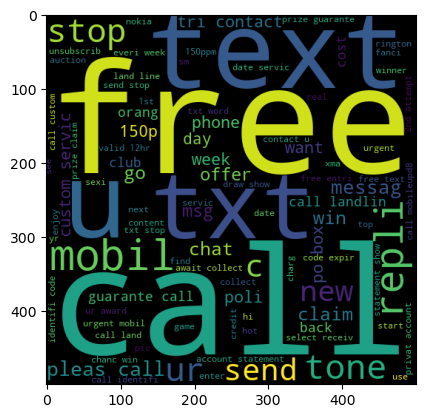

<Figure size 1200x600 with 0 Axes>

In [52]:
plt.imshow(spam_wc)
plt.figure(figsize=(12,6))

In [53]:
wc=WordCloud(width=500,height=500,min_font_size=12,background_color='black')
spam_wc = wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep=" "))

<Figure size 1200x600 with 0 Axes>

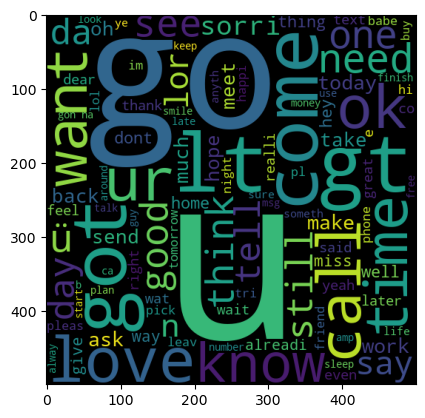

<Figure size 1200x600 with 0 Axes>

In [54]:
plt.imshow(spam_wc)
plt.figure(figsize=(12,6))

In [55]:
spam=[]
for msg in df[df['Target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam.append(word)
    

In [56]:
len(spam)

9781

In [57]:
from collections import Counter

In [58]:
Counter(spam).most_common(30)

[('call', 311),
 ('free', 186),
 ('2', 154),
 ('txt', 139),
 ('text', 122),
 ('ur', 119),
 ('u', 115),
 ('mobil', 110),
 ('stop', 108),
 ('repli', 103),
 ('claim', 96),
 ('4', 95),
 ('prize', 78),
 ('get', 73),
 ('new', 64),
 ('servic', 64),
 ('send', 60),
 ('tone', 59),
 ('urgent', 56),
 ('award', 55),
 ('nokia', 54),
 ('contact', 53),
 ('phone', 52),
 ('cash', 50),
 ('pleas', 50),
 ('week', 48),
 ('win', 46),
 ('min', 45),
 ('c', 43),
 ('guarante', 42)]

In [59]:
ham=[]
for msg in df[df['Target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham.append(word)

In [60]:
len(ham)

35940

In [61]:
Counter(ham).most_common(30)

[('u', 897),
 ('go', 407),
 ('get', 351),
 ('2', 288),
 ('gt', 288),
 ('lt', 287),
 ('come', 278),
 ('got', 239),
 ('know', 237),
 ('like', 236),
 ('call', 235),
 ('love', 222),
 ('time', 220),
 ('ok', 218),
 ('good', 215),
 ('want', 209),
 ('ur', 203),
 ('day', 195),
 ('ü', 173),
 ('need', 171),
 ('one', 166),
 ('4', 162),
 ('lor', 159),
 ('home', 152),
 ('think', 150),
 ('see', 148),
 ('take', 144),
 ('still', 144),
 ('da', 142),
 ('tell', 133)]

# MODEL Building

## text vectorization

In [62]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [63]:
cv=CountVectorizer()

In [64]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [65]:
X.shape

(5157, 6781)

In [66]:
y = df['Target'].values

In [67]:
y.shape

(5157,)

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [70]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

In [71]:
gnb=GaussianNB()

In [72]:
bnb=BernoulliNB()

In [73]:
mnb=MultinomialNB()

In [74]:
gnb.fit(X_train,y_train)

GaussianNB()

In [75]:
y_pred1=gnb.predict(X_test)

In [76]:
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
      
      

0.8691860465116279
0.4826086956521739
[[786 119]
 [ 16 111]]


In [77]:
mnb.fit(X_train,y_train)
y_pred1=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
      

0.9796511627906976
0.9206349206349206
[[895  10]
 [ 11 116]]


In [78]:
bnb.fit(X_train,y_train)
y_pred1=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
      

0.9718992248062015
0.9711538461538461
[[902   3]
 [ 26 101]]


In [79]:
tfidf = TfidfVectorizer()

In [80]:
X1=tfidf.fit_transform(df['transformed_text']).toarray()

In [81]:
X1_train,X1_test,y_train,y_test=train_test_split(X1,y,test_size=0.2,random_state=2)

In [82]:
mnb.fit(X1_train,y_train)
y_pred1=mnb.predict(X1_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
      

0.9612403100775194
1.0
[[905   0]
 [ 40  87]]


In [83]:
bnb.fit(X1_train,y_train)
y_pred1=bnb.predict(X1_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.9718992248062015
0.9711538461538461
[[902   3]
 [ 26 101]]


In [84]:
# As precision score matters more,tfidf with mnb

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [86]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [87]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [88]:
def train_classifier(clf,X1_train,y_train,X1_test,y_test):
    clf.fit(X1_train,y_train)
    y_pred = clf.predict(X1_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [89]:
train_classifier(svc,X1_train,y_train,X1_test,y_test)

(0.9718992248062015, 0.9803921568627451)

In [90]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X1_train,y_train,X1_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9718992248062015
Precision -  0.9803921568627451
For  KN
Accuracy -  0.9040697674418605
Precision -  1.0
For  NB
Accuracy -  0.9612403100775194
Precision -  1.0
For  DT
Accuracy -  0.935077519379845
Precision -  0.8191489361702128
For  LR
Accuracy -  0.9515503875968992
Precision -  0.9230769230769231
For  RF
Accuracy -  0.9670542635658915
Precision -  1.0


C:\Users\manda\anaconda3\envs\mlcourse301\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9631782945736435
Precision -  0.9587628865979382
For  BgC
Accuracy -  0.9622093023255814
Precision -  0.9074074074074074
For  ETC
Accuracy -  0.9738372093023255
Precision -  1.0
For  GBDT
Accuracy -  0.9534883720930233
Precision -  0.9759036144578314


In [91]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [92]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.904070,1.000000
2,NB,0.961240,1.000000
5,RF,0.967054,1.000000
8,ETC,0.973837,1.000000
0,SVC,0.971899,0.980392
9,GBDT,0.953488,0.975904
6,AdaBoost,0.963178,0.958763
4,LR,0.951550,0.923077
7,BgC,0.962209,0.907407
3,DT,0.935078,0.819149


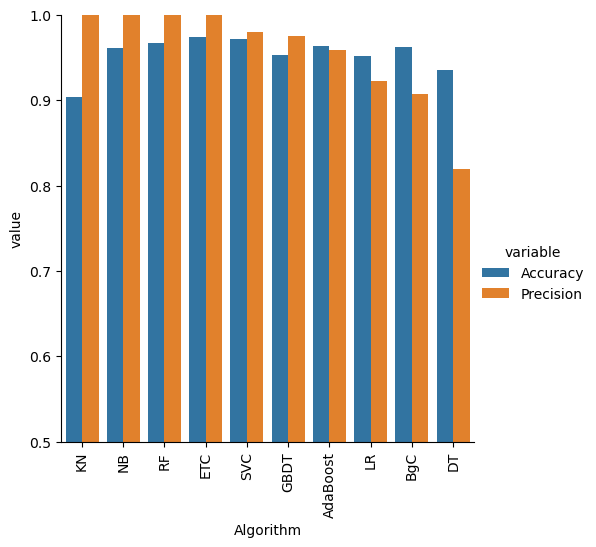

In [93]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [94]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [95]:
# improve performance
#1. changing max_features

In [96]:
tfidf = TfidfVectorizer(max_features=3000)

In [97]:
X1=tfidf.fit_transform(df['transformed_text']).toarray()

In [98]:
X1_train,X1_test,y_train,y_test=train_test_split(X1,y,test_size=0.2,random_state=2)

In [99]:
mnb.fit(X1_train,y_train)
y_pred1=mnb.predict(X1_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
      

0.9709302325581395
1.0
[[905   0]
 [ 30  97]]


In [100]:
bnb.fit(X1_train,y_train)
y_pred1=bnb.predict(X1_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.9835271317829457
0.9824561403508771
[[903   2]
 [ 15 112]]


In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [102]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [103]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [104]:
def train_classifier(clf,X1_train,y_train,X1_test,y_test):
    clf.fit(X1_train,y_train)
    y_pred = clf.predict(X1_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [105]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X1_train,y_train,X1_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9757751937984496
Precision -  0.9811320754716981
For  KN
Accuracy -  0.9127906976744186
Precision -  1.0
For  NB
Accuracy -  0.9709302325581395
Precision -  1.0
For  DT
Accuracy -  0.936046511627907
Precision -  0.8210526315789474
For  LR
Accuracy -  0.9583333333333334
Precision -  0.9375
For  RF
Accuracy -  0.9728682170542635
Precision -  1.0


C:\Users\manda\anaconda3\envs\mlcourse301\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9660852713178295
Precision -  0.9423076923076923
For  BgC
Accuracy -  0.9612403100775194
Precision -  0.8918918918918919
For  ETC
Accuracy -  0.9777131782945736
Precision -  0.9905660377358491
For  GBDT
Accuracy -  0.9554263565891473
Precision -  0.9764705882352941


In [106]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [107]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [108]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.904070,1.000000,0.912791,1.000000
1,NB,0.961240,1.000000,0.970930,1.000000
2,RF,0.967054,1.000000,0.972868,1.000000
3,ETC,0.973837,1.000000,0.977713,0.990566
4,SVC,0.971899,0.980392,0.975775,0.981132
5,GBDT,0.953488,0.975904,0.955426,0.976471
6,AdaBoost,0.963178,0.958763,0.966085,0.942308
7,LR,0.951550,0.923077,0.958333,0.937500
8,BgC,0.962209,0.907407,0.961240,0.891892
9,DT,0.935078,0.819149,0.936047,0.821053


In [109]:
# Normally ETC with tfidf is best model here.

# Final model

In [110]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [113]:
etc.fit(X_train,y_train)
y_pred1=etc.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.9748062015503876
1.0
[[905   0]
 [ 26 101]]


In [115]:
import pickle
pickle.dump(etc,open('model.pkl','wb'))

In [116]:
model=pickle.load(open('model.pkl','rb'))